In [20]:
%matplotlib inline
import tensorflow as tf
from d2l import tensorflow as d2l

### 3.5.1. Defining the Model
When we implemented linear regression from scratch in Section 3.4, we defined our model parameters explicitly and coded up the calculations to produce output using basic linear algebra operations. You should know how to do this. But once your models get more complex, and once you have to do this nearly every day, you will be glad of the assistance. The situation is similar to coding up your own blog from scratch. Doing it once or twice is rewarding and instructive, but you would be a lousy web developer if you spent a month reinventing the wheel.

For standard operations, we can use a framework’s predefined layers, which allow us to focus on the layers used to construct the model rather than worrying about their implementation. Recall the architecture of a single-layer network as described in Fig. 3.1.2. The layer is called fully connected, since each of its inputs is connected to each of its outputs by means of a matrix–vector multiplication.

In Keras, the fully connected layer is defined in the Dense class. Since we only want to generate a single scalar output, we set that number to 1. It is worth noting that, for convenience, Keras does not require us to specify the input shape for each layer. We do not need to tell Keras how many inputs go into this linear layer. When we first try to pass data through our model, e.g., when we execute net(X) later, Keras will automatically infer the number of inputs to each layer. We will describe how this works in more detail later.
http://preview.d2l.ai/d2l-en/master/chapter_linear-regression/linear-regression-concise.html

In [2]:
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        initializer = tf.initializers.RandomNormal(stddev=0.01)
        self.net = tf.keras.layers.Dense(1, kernel_initializer=initializer)

In [3]:
@d2l.add_to_class(LinearRegression)  #@save
def forward(self, X):
    return self.net(X)

In [4]:
@d2l.add_to_class(LinearRegression)  #@save
def configure_optimizers(self):
    return tf.keras.optimizers.SGD(self.lr)

In [5]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w = tf.constant([2, -3.4]), b = 4.2)

In [6]:
trainer = d2l.Trainer(max_epochs=3)
trainer.fit

<bound method Trainer.fit of <d2l.tensorflow.Trainer object at 0x7f268a205e40>>

In [12]:
# Manual Basic loss f
@d2l.add_to_class(LinearRegression)  #@save #FromScratch
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return tf.reduce_mean(l)
# Let's over-ride the loss-function.
@d2l.add_to_class(LinearRegression)  #@save
def loss(self, y_hat, y):
    fn = tf.keras.losses.MeanSquaredError()
    return fn(y, y_hat)

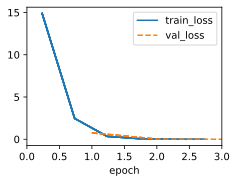

In [13]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=tf.constant([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

Below, we compare the model parameters learned by training on finite data and the actual parameters that generated our dataset. To access parameters, we access the weights and bias of the layer that we need. As in our implementation from scratch, note that our estimated parameters are close to their true counterparts.

In [17]:
@d2l.add_to_class(LinearRegression)  #@save
def get_w_b(self):
    return (self.get_weights()[0], self.get_weights()[1])

w, b = model.get_w_b()

In [21]:
print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: [ 0.00390744 -0.01321244]
error in estimating b: [0.01417303]
